# Python yordamida ko'p chiziqli regressiya

In [2]:
import pandas as pd
import numpy as np
import string
import csv
import random
import warnings


In [3]:
## Modelni qurish 
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

## Ma'lumotlarni vizualazizatsiyalash
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## O'quv natijalari, davomat va ijtimoiy-iqtisodiy omillarga asoslanib, kursdan-kursga qolish xavfi  ostida bo’lgan talabalarning ma’lumotlari mavjud. Mavjud ma’lumotlar asosida quyidagilarni aniqlang:

## 1. Ma’lumotlar bazasidagi har bir atribut orasidagi tarqalish grafigini hosil qiling.

In [4]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

# Load dataset
df_pie = pd.read_csv('data6.csv', sep=',')

print(df_pie.shape)
df_pie


(19, 4)


,ijtimoiy holati,o'rtacha bahosi,davomat,kursdan o'tishi
0,0,1.8,25,0
1,6,3.6,87,1
2,4,3.4,82,1
3,1,2.2,21,0
4,6,2.6,42,0
5,5,3.2,83,1
6,0,3.2,50,0
7,4,2.6,65,1
8,3,2.8,31,0
9,5,2.6,37,0


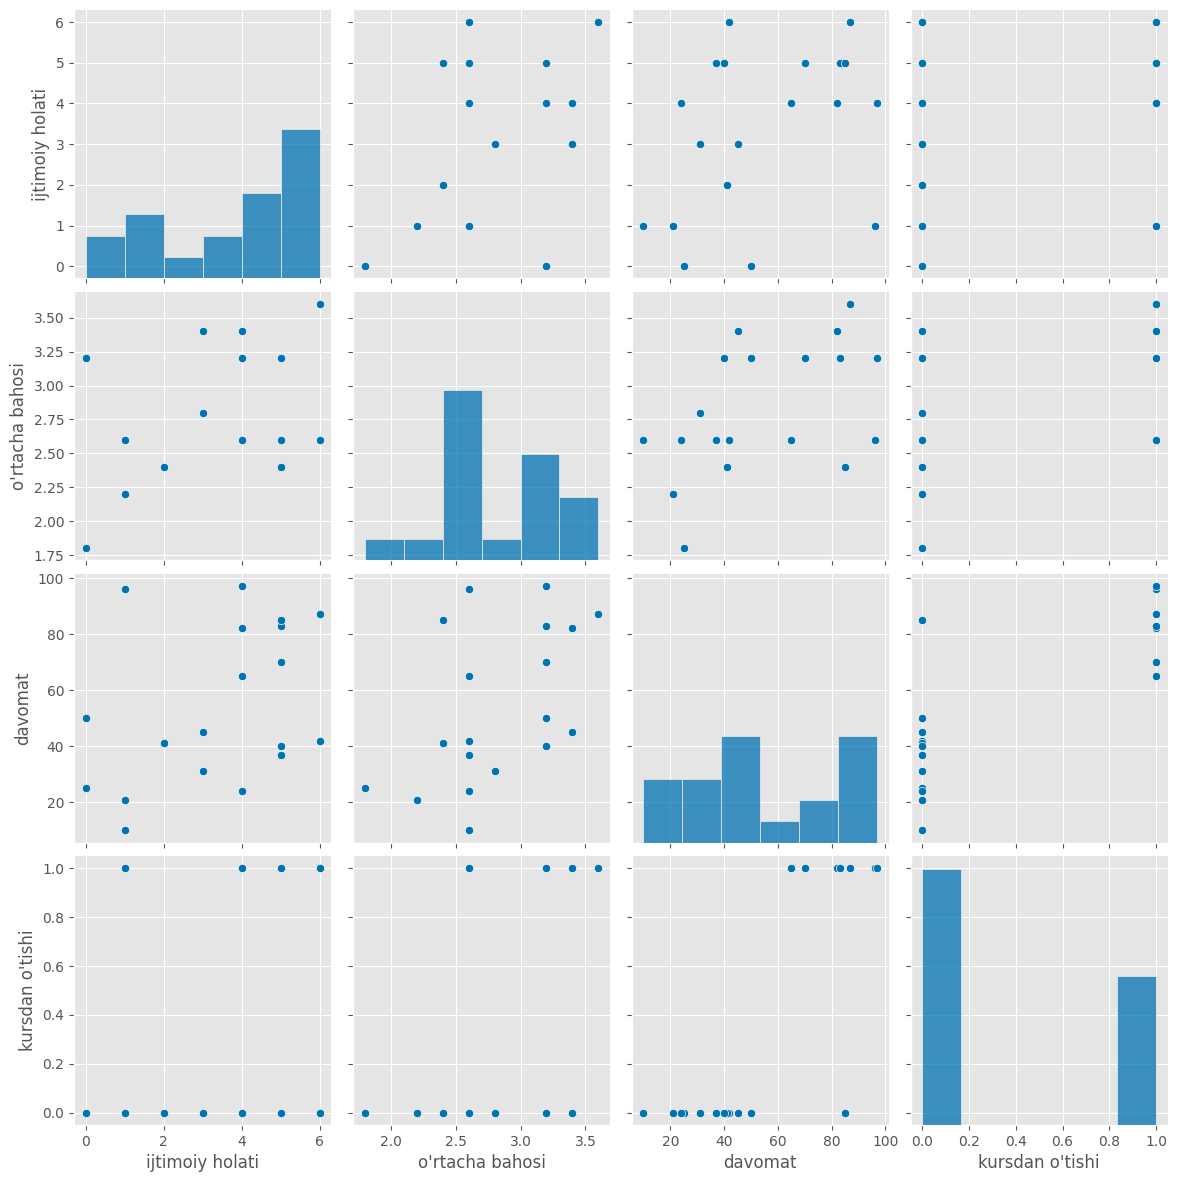

In [5]:
sns.set_palette('colorblind')
sns.pairplot(data=df_pie, height=3)

Jadvaldagi __Ijtimoiy holati__, __Fannlardan olingan baholari__, __o'rtacha bahosi__, __davomati__ bog'liq o'zgaruvchilari. __Kursdan kursga o'tish__ mustaqil o'zgaruvchidir. Har bir talabaning o'zlashtrish baxosi 2.6 dan yuqori va darslarda qatnashganlik %i yuqori bo'lganda kursdan kursga o'tishi 1 aks holda 0 etib belgilandi.

Birinchi tartiblangan ustun, Ijtimoiy holati, Fannlardan o'zlashtrgan o'rtacha baxosi, davomati bog'liq o'zgaruvchi. Kursdan kursga o'tish mustaqil o'zgaruvchi. Har bir talabaning o'zlashtrish baxosi 2.6 dan yuqori va darslarda qatnashganlik %i yuqori bo'lganda kursdan kursga o'tishi 1 aks holda 0 etib belgilandi.

## 3. Regressiya modelini quring. Qurilgan modelni hisobot shaklida yozing.

In [6]:
print("4.3. Regressiya modelini quring. Qurilgan modelni hisobot shaklida yozish")
df_data = pd.read_csv('data6.csv', sep=',')
# Mustaqil va bog'liq o'zgaruvchilarni o'rnatish
X = df_data[["ijtimoiy holati", "o'rtacha bahosi","davomat"]]
y = df_data["kursdan o'tishi"]

# Sklearn kutubxonasidan modelni ishga tushirish va uni  ma'lumotlarimizga moslash
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Koeffisiyentlar:', model.coef_)

4.3. Regressiya modelini quring. Qurilgan modelni hisobot shaklida yozish
Intercept: -0.7086529143316125
Koeffisiyentlar: [-0.01224276  0.13374254  0.01365601]


Y= 0.1939 - (- 0.00957211) * X_1 + 0.12006244*X2 + 0.0009594*X3

1. Kesish qiymati bizning barcha mustaqil o'zgaruvchilarimizning qiymatlari 0 bo'lsa, bog'liq o'zgaruvchining taxminiy o'rtacha qiymatidir. Bizning holatda bu shuni anglatadiki, agar ijtimoiy holati-yaxshi, o'zlashtrish baxosi 2.6 dan yuqori va davomati 25% danyuqori ko'rsatkichni qaytarsa biz taxminan 0 ta o'quvchi kursdan kursga qoladi.2.  Koeffitsiyentlar uchun biz mos ravishda "Ijtimoiy holat" , "o'rtacha baxo" va davomat o'zgaruvchilari uchun 3 ta qiymatga egamiz. Bu qiymat bizning mustaqil o'zgaruvchimizning bog'liq o'zgaruvchiga munosabatini ifodalaydi, bunda mustaqil o'zgaruvchida aynan 1 ga o'zgarishi bizning bog'liq o'zgaruvchimizning qiymatini koeffitsiyent bilan bir xil miqdorda o'zgartiradi. Misol uchun, agar o'quvchilar o'rtacha baxosi 2.6 dan kamaysa unda taxminan har bir 2.6 dan kamaygan talaba kursdan kursga qolish soni ortib boradi, davomat  36% dan oshgan talabalar ham kursdan kursgaqolish holati ko'payadi

## 4. Regressiya modeliga ko’ra, bog’liq o’zgaruvchilarning qiymati aniq bo’lsa, talabaning kursdan kursga qolishini bashorat qiling.

In [43]:
ijtimoiy = ["temir daftar", "boquvchisini yo'qotgan", "chin yetim", "yoshlar daftari", "ijtimoiy ximoyaga muhtoj oila reestr", "oilali", "yolg'iz"]
for i in ijtimoiy:
    print(i, end=", ")

temir daftar, boquvchisini yo'qotgan, chin yetim, yoshlar daftari, ijtimoiy ximoyaga muhtoj oila reestr, oilali, yolg'iz, 

In [70]:
# Bashorat qilinadigan qiymatlar
print("Talaba ma'lumotlarini kiriting")
social = input('Ijtimoiy xolatini kiriting (0 dan 7 gacha)? \n')
grade = input("o'rtacha bahosini kiriting  (butun son) ? \n")
attendance = input("Darslarga qatlashganlik (davomati) % (0 dan 100&) ? \n")

#social_d = ijtimoiy[social]

try:
    print('Talaba kursdan kursga "{}", Agar ijtimoiy holati "{}" bo\'lsa , o\'rtacha bahosi "{}" bo\'lsa va davomati "{}%" bo\'lsa.'.format(
        ("o'tmaydi", "o'tadi")[model.predict([[float(social), float(grade), float(attendance)]])[0]>0.25],
        social, 
        grade, 
        attendance))
except Exception as e: print(e)
# except ValueError:
    # print('Faqat butun son kiriting:\n- masalan, 1, 4, 7\n- haqiqiy son kiriting e.g. 3.8')


Talaba ma'lumotlarini kiriting


Ijtimoiy xolatini kiriting (0 dan 7 gacha)? 
 4
o'rtacha bahosini kiriting  (butun son) ? 
 4.5
Darslarga qatlashganlik (davomati) % (0 dan 100&) ? 
 80


Talaba kursdan kursga "o'tadi", Agar ijtimoiy holati "4" bo'lsa , o'rtacha bahosi "4.5" bo'lsa va davomati "80%" bo'lsa.
